In [42]:
import numpy as np


class AdalineGD(object):
  eta : float
  n_iter : int
  random_state : int

  w_: np.array
  cost_ : list # список значений функции ошибок
  
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + len(X[0]))
    self.cost_ = []

    for _ in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors) # та формула
      self.w_[0] += self.eta * errors.sum()
      cost = (errors ** 2).sum() / 2.0
      self.cost_.append(cost)
    return self
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.net_input(self.activation(X)) >= 0.0, 1, -1)
  
  def score(self, X, y):
    return str(sum(y == self.predict(X)) / len(y) * 100) + "%"    # f"{(points / len(y)) * 100}%"

In [43]:
import pandas as pd
import os
from sklearn import datasets
from IPython.display import display


data = datasets.load_iris() # setosa, versicolor, virginica
dataset = pd.DataFrame(data.data, columns=data.feature_names).iloc[:100, [0, 2]].values
y = np.array([1] * 50 + [-1] * 50)

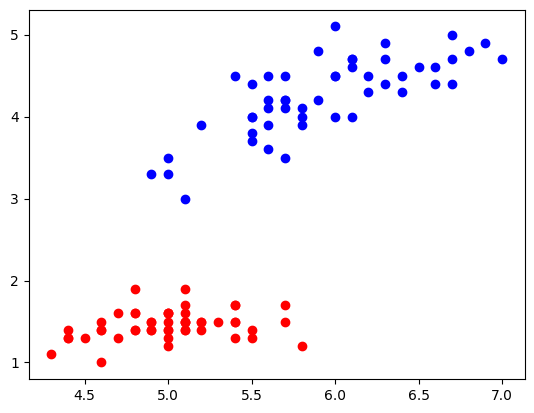

In [44]:
import matplotlib.pyplot as plt

plt.scatter(dataset[:50, 0], dataset[:50, 1], color='red')
plt.scatter(dataset[50:, 0], dataset[50:, 1], color='blue')

plt.show()

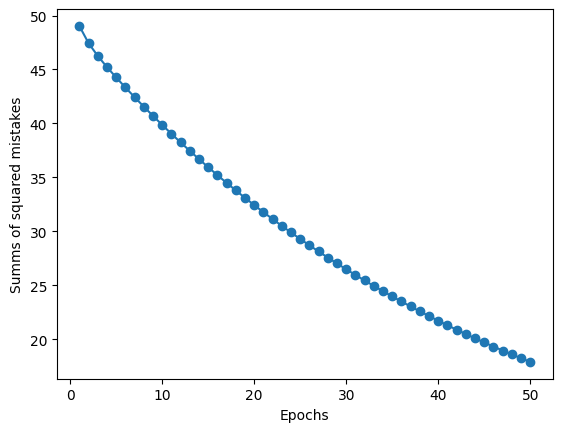

In [45]:
ppn = AdalineGD(n_iter=50, eta=0.0001)
ppn.fit(dataset, y)
plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Summs of squared mistakes")
plt.show()

In [46]:
print(ppn.score(dataset, y))

100.0%
